# Task 3 - Model Explainability using SHAP

In this notebook, we interpret the Random Forest model trained in Task 2 using SHAP (SHapley Additive explanations). We generate summary and force plots to explain global and local feature importance.

In [ ]:
# Install SHAP
!pip install shap --quiet

In [42]:
import shap
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For visualizations
shap.initjs()

In [43]:
# Load trained Random Forest model
rf_model = joblib.load("../models/random_forest_model.pkl")

# Load processed test set (with feature names)
X_test = pd.read_csv("../data/processed/X_test_task2.csv")

# Separate target
y_test = X_test.pop('target')

# For SHAP explainer, we need data in numpy or DataFrame format
X_sample = X_test.sample(100, random_state=42)  # sample for performance

In [44]:
# Use TreeExplainer for tree-based models like RandomForest
explainer = shap.Explainer(rf_model, X_sample)

# Calculate SHAP values
shap_values = explainer(X_sample)

 96%|=================== | 191/200 [00:21<00:00]       

## 🔍 Global Interpretability: SHAP Summary Plot

The SHAP summary plot shows which features are most important across all predictions. It ranks features by their average impact on the model output.

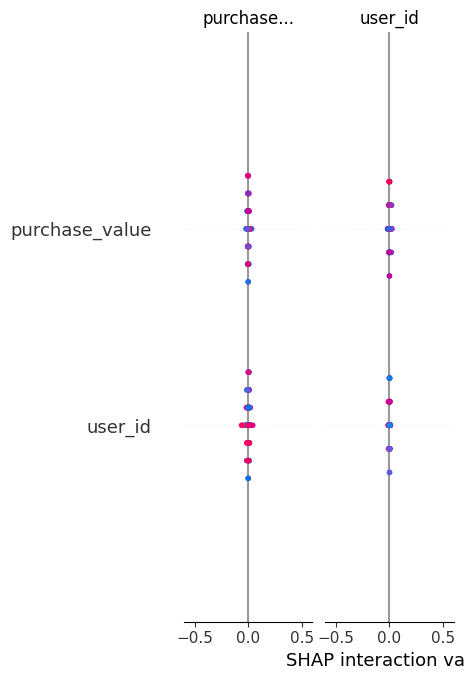

In [5]:
# Summary plot: global feature importance
shap.summary_plot(shap_values, X_sample)

## 🔍 Local Interpretability: SHAP Force Plot (Single Prediction)

The SHAP force plot shows how each feature contributed to an individual prediction (whether it pushed it toward fraud or non-fraud).

In [9]:
print(explainer.expected_value)

[0.8993 0.1007]


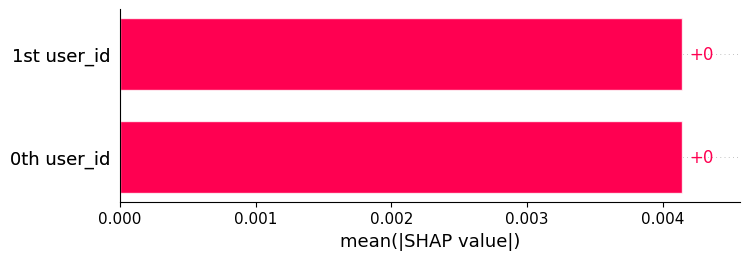

In [24]:
# Create a new explanation only for class 1
shap_explanation_class1 = shap.Explanation(
    values=shap_explanation.values[:, 1],
    base_values=shap_explanation.base_values[:, 1],
    data=shap_explanation.data,
    feature_names=shap_explanation.feature_names
)

# Now plot
shap.plots.bar(shap_explanation_class1)

In [31]:
print("SHAP values shape:", shap_explanation.values.shape)
print("Data shape:", shap_explanation.data.shape)

SHAP values shape: (1, 10, 2)
Data shape: (1, 10)


Class 1 SHAP values shape: (10,)
Class 1 data shape: (10,)


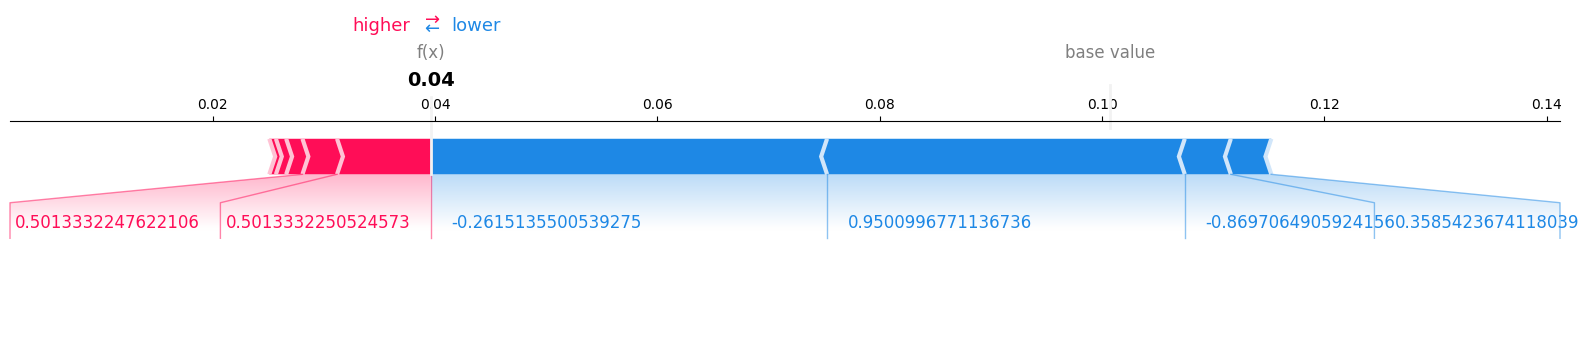

In [33]:
import shap

# Extract SHAP values for class 1 (index 1)
shap_values_class1 = shap_explanation.values[:, :, 1].squeeze()  # Shape will be (1, 10)
base_value_class1 = shap_explanation.base_values[0, 1]  # Scalar for the first instance and class 1

# Create Explanation for class 1
shap_explanation_class1 = shap.Explanation(
    values=shap_values_class1,            # SHAP values for class 1
    base_values=base_value_class1,         # Use a single base value for class 1
    data=shap_explanation.data.squeeze(),  # Flatten if necessary
    feature_names=shap_explanation.feature_names
)

# Check the shape of the new explanation object
print("Class 1 SHAP values shape:", shap_explanation_class1.values.shape)
print("Class 1 data shape:", shap_explanation_class1.data.shape)

# Now generate the force plot
shap.force_plot(
    shap_explanation_class1.base_values,  # Base value for class 1
    shap_explanation_class1.values,        # SHAP values for class 1
    shap_explanation_class1.data,          # Feature data
    matplotlib=True                        # Render with matplotlib
)

In [38]:
force_plot = shap.force_plot(
    explainer.expected_value[1],          # base value for class 1
    shap_values[i][:, 1],                  # SHAP values for instance i and class 1
    X_sample.iloc[i],                      # feature values for instance i
)

shap.save_html("../outputs/force_plot_instance5.html", force_plot)


In [40]:
import joblib

# Save shap_explanation_class1 object
joblib.dump(shap_explanation_class1, "../models/shap_explanation_class1.pkl")

['../models/shap_explanation_class1.pkl']